In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('C:\\Users\\Manar\\Desktop\\AirLines.csv')

In [3]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3.0,15.0,205.0,1
1,2,US,1558,PHX,CLT,3.0,15.0,NaN,1
2,3,AA,2400,LAX,DFW,3.0,NaN,165.0,1
3,4,AA,2466,SFO,DFW,3.0,20.0,195.0,1
4,5,AS,108,ANC,SEA,3.0,30.0,202.0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           539383 non-null  int64  
 1   Airline      539383 non-null  object 
 2   Flight       539383 non-null  int64  
 3   AirportFrom  539383 non-null  object 
 4   AirportTo    539383 non-null  object 
 5   DayOfWeek    539383 non-null  float64
 6   Time         539383 non-null  float64
 7   Length       539383 non-null  float64
 8   Delay        539383 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 37.0+ MB


In [17]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [18]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [19]:
#preprocessing data


In [20]:
#missing value replace it with mean value
df['DayOfWeek']=df['DayOfWeek'].fillna(df['DayOfWeek'].mean())
df['Time']=df['Time'].fillna(df['Time'].mean())
df['Length']=df['Length'].fillna(df['Length'].mean())

In [21]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [22]:
df.shape

(539383, 9)

In [23]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929687,802.740565,132.201794,0.445442
std,155706.60446,2067.429837,1.914660,278.033399,70.116117,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [24]:
#category 
df['Delay'].value_counts()

Delay
0    299119
1    240264
Name: count, dtype: int64

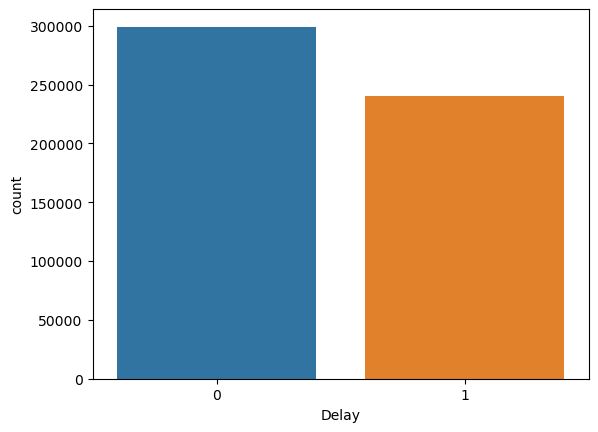

Delay
0    0.554558
1    0.445442
Name: proportion, dtype: float64

In [25]:
#Visualize Delay column
sns.countplot(x='Delay',data=df)
plt.show()
df['Delay'].value_counts(normalize=True)

In [26]:
data=df.drop(columns='id',axis=1)

C:\Users\Manar\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manar\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manar\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manar\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

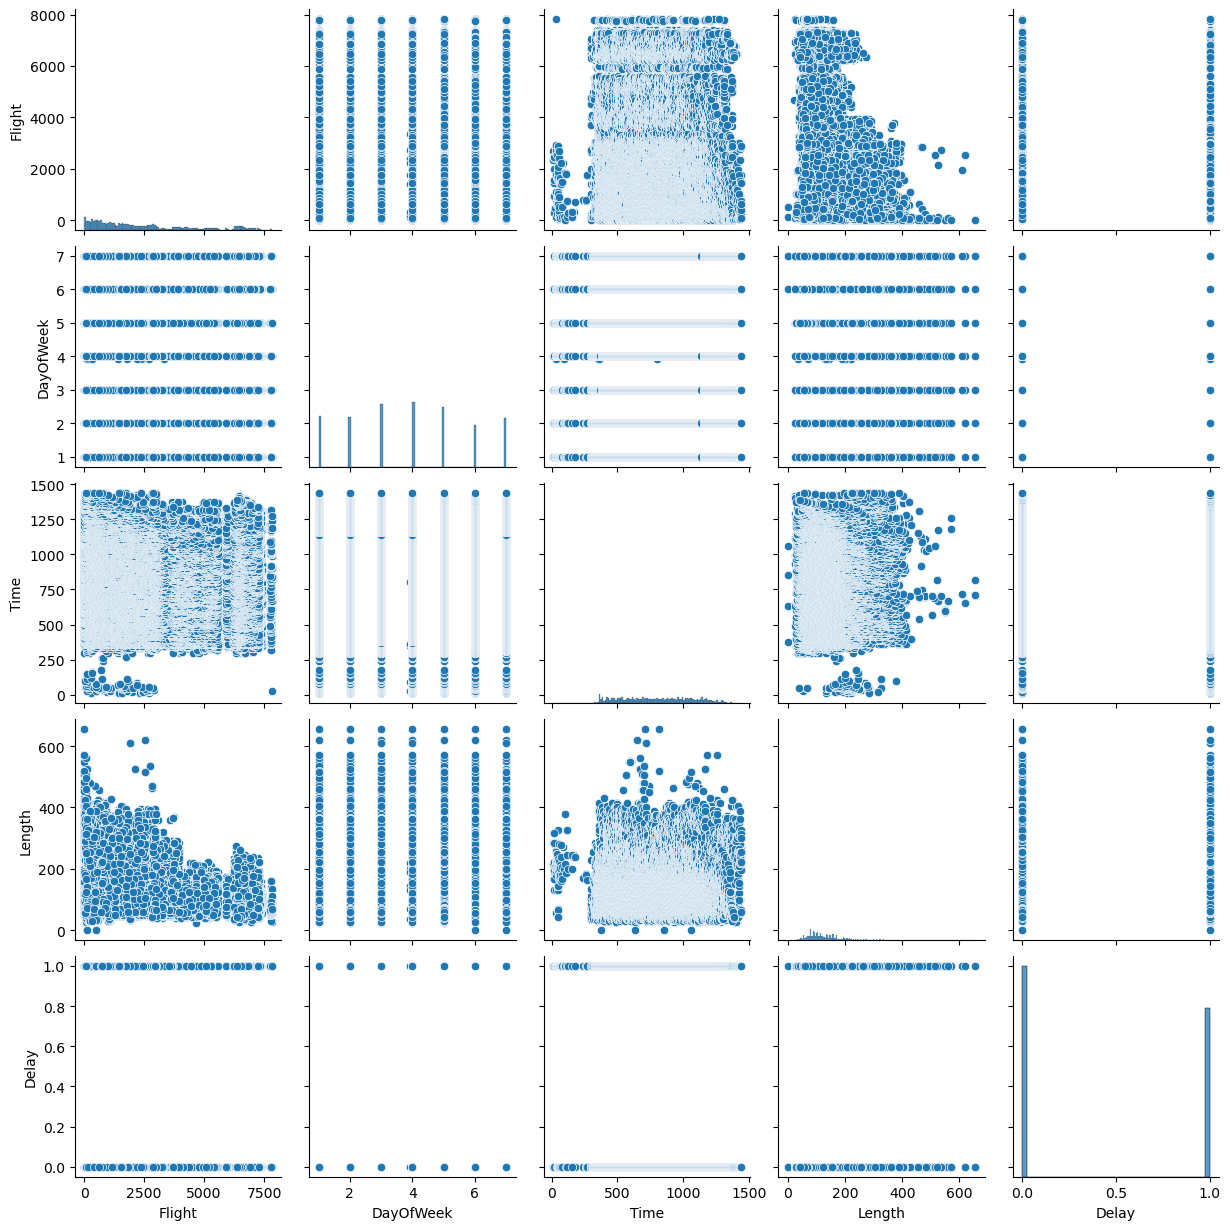

In [27]:
#visualize relationship between variable 
sns.pairplot(data)

In [28]:
data.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3.0,15.000000,205.000000,1
1,US,1558,PHX,CLT,3.0,15.000000,132.201794,1
2,AA,2400,LAX,DFW,3.0,802.740565,165.000000,1
3,AA,2466,SFO,DFW,3.0,20.000000,195.000000,1
4,AS,108,ANC,SEA,3.0,30.000000,202.000000,0


In [29]:
X=pd.DataFrame({'DayOfWeek': df['DayOfWeek'], 'Time': df['Time'],    'Length': df['Length'] ,'Flight': df['Flight'] })
Y=data['Delay']


In [30]:
X

,DayOfWeek,Time,Length,Flight
0,3.0,15.000000,205.000000,269
1,3.0,15.000000,132.201794,1558
2,3.0,802.740565,165.000000,2400
3,3.0,20.000000,195.000000,2466
4,3.0,30.000000,202.000000,108
...,...,...,...,...
539378,5.0,1439.000000,326.000000,178
539379,5.0,1439.000000,305.000000,398
539380,5.0,1439.000000,255.000000,609
539381,5.0,1439.000000,313.000000,78


In [31]:
Y

0         1
1         1
2         1
3         1
4         0
         ..
539378    0
539379    0
539380    0
539381    1
539382    1
Name: Delay, Length: 539383, dtype: int64

In [32]:
#spliting data into traing & test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.40, random_state=42)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(539383, 4) (323629, 4) (215754, 4)


In [35]:
print(Y.shape,Y_train.shape,Y_test.shape)

(539383,) (323629,) (215754,)


In [36]:
#Model training

In [37]:
#Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
model=LogisticRegression()

In [40]:
model.fit(X_train,Y_train)

LogisticRegression()

In [41]:
#Evaluate

In [42]:
#Accuracy
pred_lc=model.predict(X_train)
train_accuracy=accuracy_score(pred_lc,Y_train)


In [43]:
print("accuracy of training data is ",train_accuracy)

accuracy of training data is  0.5663274922828301


In [44]:
#build a predictive system

In [45]:
test_value=(4.0,99.9165,370.000000,568)
#change input data to numpy array
input_data=np.asarray(test_value)
input_data_reshape=input_data.reshape(1,-1)
prediction=model.predict(input_data_reshape)
print(prediction)
if(prediction[0]==0):
    print("not delay flight")
else:
    print("delay flight")
    

[0]
not delay flight


C:\Users\Manar\anaconda4\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
#Decision tree 

In [47]:
d=DecisionTreeClassifier()
d.fit(X_train,Y_train)

DecisionTreeClassifier()

In [48]:
pred_d=d.predict(X_train)

In [49]:
#different between actual test and predict test
d.score(X_test,Y_test)

0.6021672831094672

In [50]:
train_accuracy_tree=accuracy_score(pred_d,Y_train)

In [51]:
print("Accuracy",train_accuracy_tree)

Accuracy 0.8519879244443483


In [52]:
# Decision tree
pred_d_test = d.predict(X_test)

# Generate classification report on the test set
class_report = classification_report(Y_test, pred_d_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.63      0.70      0.66    119796
           1       0.56      0.48      0.52     95958

    accuracy                           0.60    215754
   macro avg       0.59      0.59      0.59    215754
weighted avg       0.60      0.60      0.60    215754



In [53]:
# Logistic Regression
pred_l_test = model.predict(X_test)

# Generate classification report on the test set
class_report = classification_report(Y_test, pred_l_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.58      0.76      0.66    119796
           1       0.52      0.32      0.40     95958

    accuracy                           0.57    215754
   macro avg       0.55      0.54      0.53    215754
weighted avg       0.56      0.57      0.55    215754

